# Covariation exercise

Complete the following exercises on covariance structure using Numpy based tools

You will also want Matplotlib and Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# here is an import of the classic iris data set

#it load as a pd DataFrame,  we will extract the numpy matric from it

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# iris 0-3 are the measurements,  species is iris[,4] is a class
# extract the predictors

iris_np=iris.iloc[:,0:4].to_numpy()

#check the shape of the resulting np matrix

iris_np.shape

(150, 4)

Question 1

Find the variance matrix for iris_np,   also find the correlation matrix

In [6]:
iris_np.var()

3.896056416666667

Question 2   produce heat maps of the iris_np variance and correlation matrices

In [20]:
reduced= iris_np[0:10,0:10]

<Axes: >

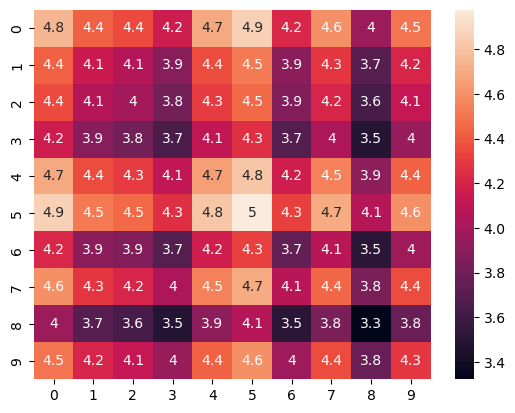

In [21]:
sns.heatmap(np.cov(reduced),annot=True)

<Axes: >

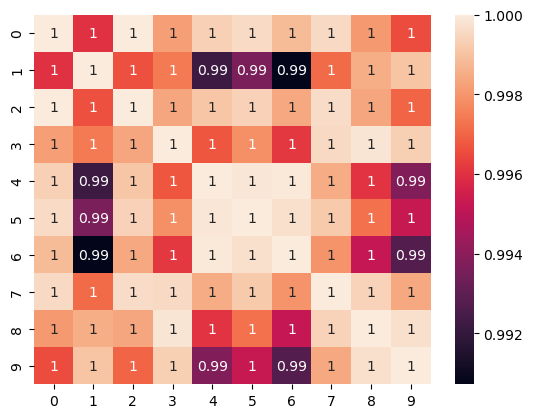

In [22]:
sns.heatmap(np.corrcoef(reduced),annot=True)

Question 3 show the "Scatter plot matrix" for the iris_np data using the sns pairgrid function,  inserting histograms along
the diagonals

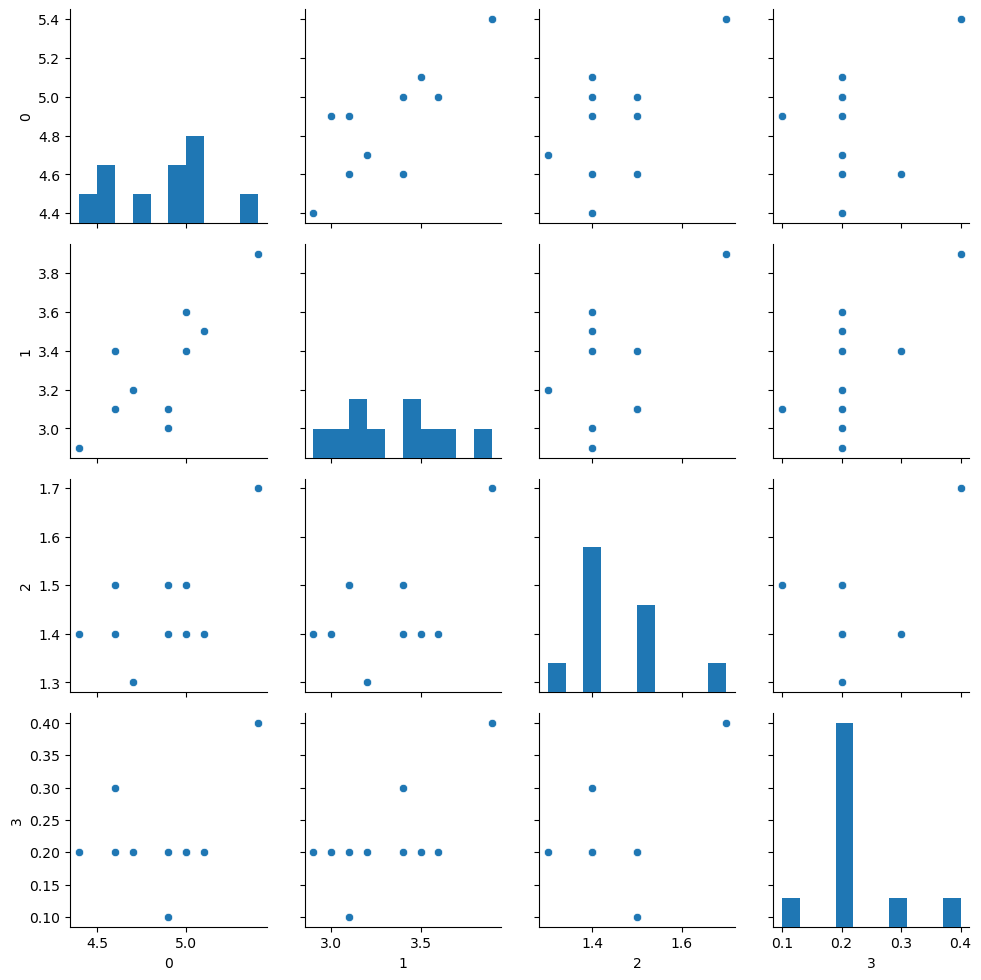

In [24]:
g = sns.PairGrid(pd.DataFrame(reduced))
g = g.map_diag(plt.hist)
#g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Question 4  Run the eigen analysis

How many distinct variables appear to be present

In [32]:
w,v=np.linalg.eigh(np.corrcoef(iris_np))
print(len(np.unique(w)), "distinct variables appear to be present")

150 distinct variables appear to be present


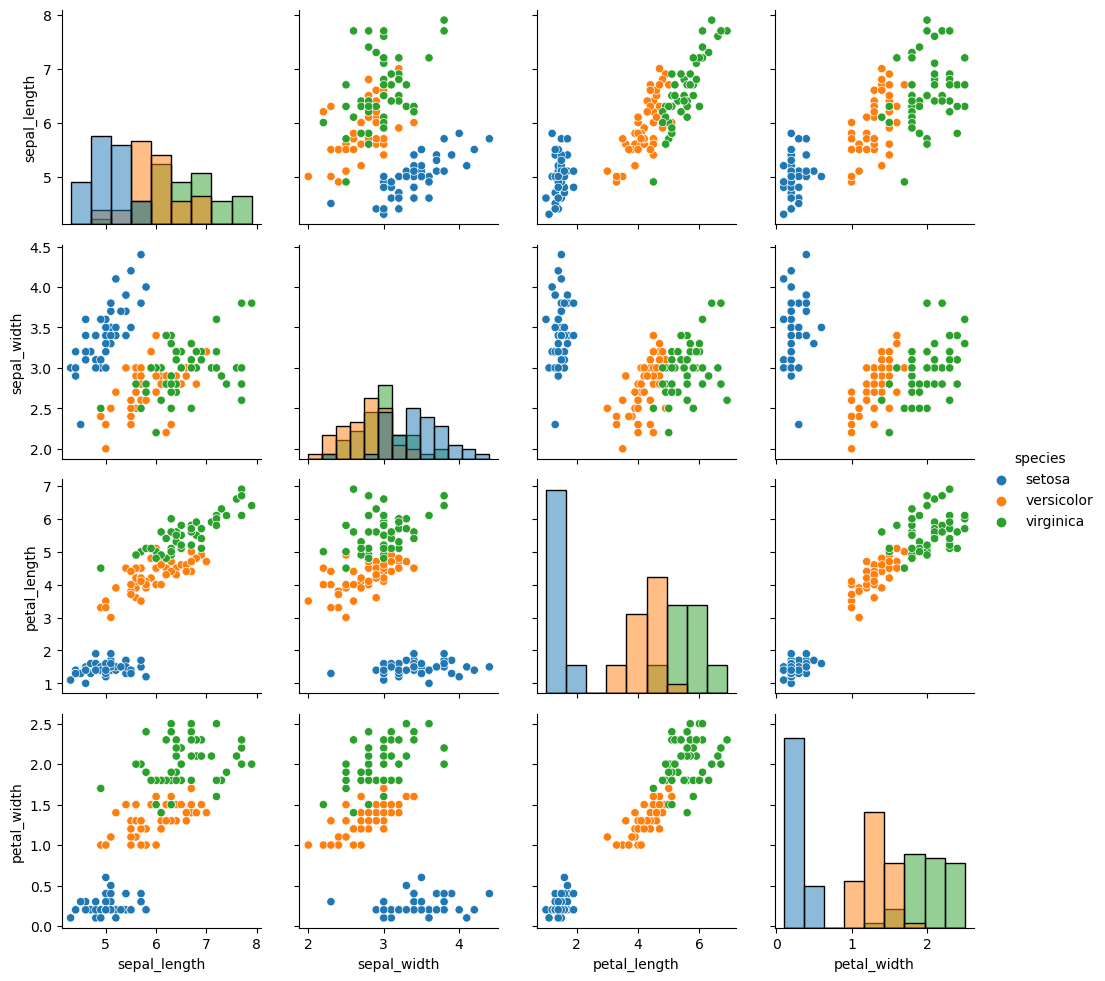

In [33]:
# this code,  using the pandas data frame adds some more capabilities to the pairgrid display

# explain what this tells you about the potential for building a tool to classify the iris data by species?

g = sns.PairGrid(iris, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Answer: 
- Difference petal length and width  and sepal width Setosa and compared to versicolor and virginica

Question 4-  Explain what the color code pairgrid above tells you about how likely it is you could create a classifier based 
on these measurements

Answer:
- the color code pairgrid compares the species based on a possible relationship between changes observed in two different sets of variables


Question 5 -   carry out a standard scaling of the data in the 0 column in iris_np

Verify that mean and variance have the expected values

In [39]:
print(iris_np.mean(), iris_np.var())

#standard scaling
xc = iris_np-iris_np.mean()
xs=xc/np.var(xc)**0.5
print(xs.mean(), xs.var())

3.4644999999999997 3.896056416666667
9.473903143468003e-17 1.0


Answer:
-  we can see that the variance is equal to 1, and the mean is close to 0 


Question 6- carry out a normalization of the 1 position column in iris-np

find the range of the normalized data, it's mean and variance

In [43]:
xn=iris_np/(iris_np.max()-iris_np.min())
xn.min(), xn.max(), xn.max()-xn.min()
# Notice that the min and the max are close to one other (the Range is one )

(0.01282051282051282, 1.0128205128205128, 1.0)